## Customer Personality Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
#from yellowbrick.cluster import KElbowVisualizer
from math import pi

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep = "\t")
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).T

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Missing Values,0,0,0,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Solo income tiene nulos, así que lo rellenamos con la media
df.Income = df.Income.fillna(df.Income.mean())

In [6]:
# Duplicados
df.duplicated().sum()
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
# Borramos columnas que no aportan info
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [8]:
# Separamos entre numéricas y categóricas
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y', errors='coerce')
num_cols = df.select_dtypes(exclude='object').columns
cat_cols = df.select_dtypes(include='object').columns
print(f'Numericas: {num_cols.tolist()}\nCategoricas : {cat_cols.tolist()}')

Numericas: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
Categoricas : ['Education', 'Marital_Status']


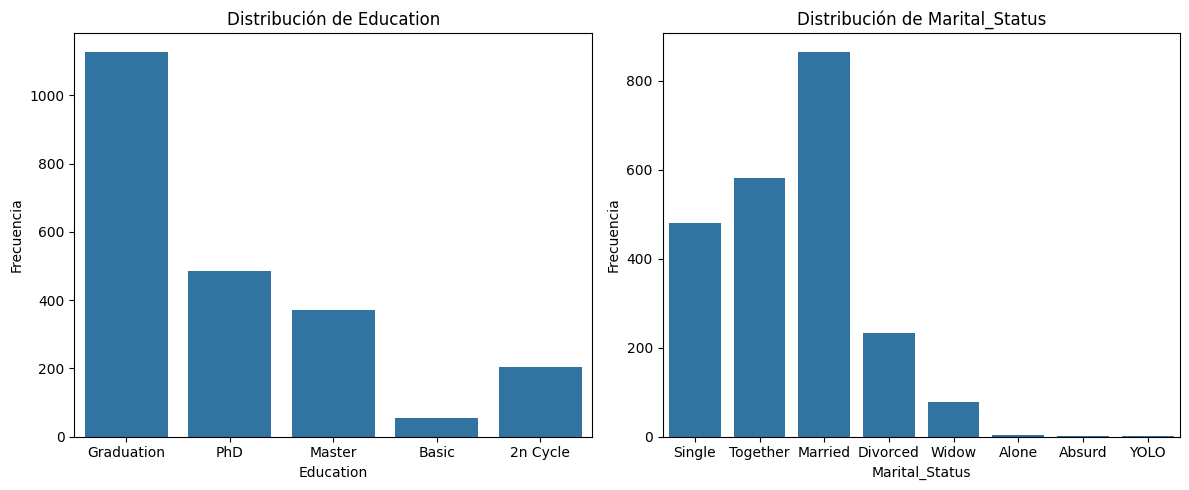

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for ax, column in zip(axes.flatten(), cat_cols):
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [10]:
# Reemplazamos valores ya que hay muchas opciones
df.Education = df.Education.replace(
    {
        "Basic": "Primaria",
        "2n Cycle": "Primaria",
        "Graduation": "Grado",
        "Master": "Postgrado",
        "PhD": "Postgrado",
    }
)

df["Situacion_Marital"] = df.Marital_Status.replace(
    {
        "Married": "En pareja",
        "Together": "En pareja",
        "Absurd": "Solo",
        "Widow": "Solo",
        "YOLO": "Solo",
        "Divorced": "Solo",
        "Single": "Solo",
        "Alone": "Solo"
    }
)

# Borramos marital_status e ID ya que no nos hacen falta
df = df.drop(['Marital_Status', 'ID'], axis=1)

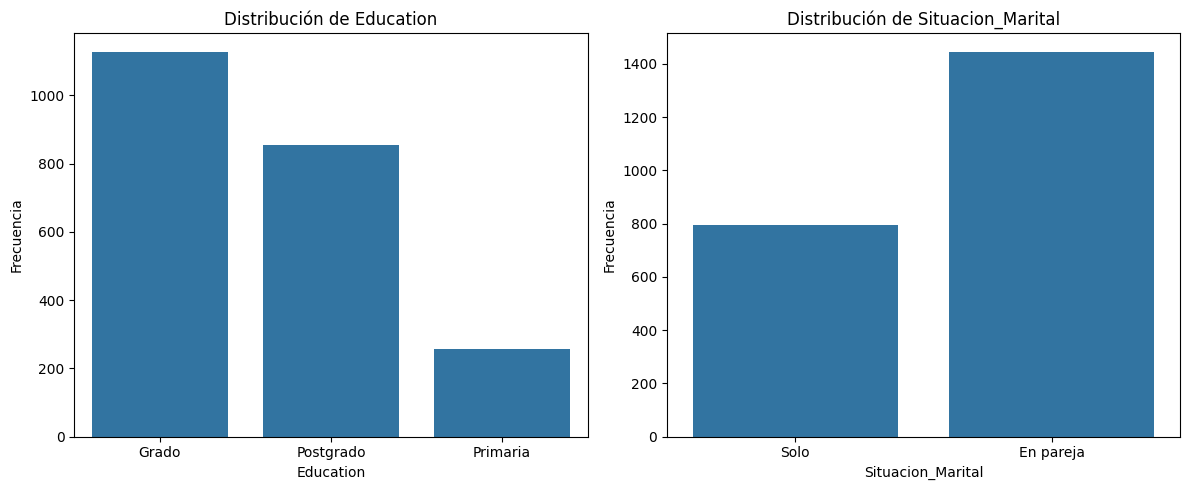

In [11]:
cat_cols = df.select_dtypes(include='object').columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for ax, column in zip(axes.flatten(), cat_cols):
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [12]:
# CREACIÓN DE VARIABLES
from datetime import datetime

df['Edad'] = 2024 - df.Year_Birth
df['Total_Gastado'] = df.MntWines + df.MntFruits + df.MntMeatProducts + df.MntFishProducts + df.MntSweetProducts + df.MntGoldProds
df['Hijos'] = df.Kidhome + df.Teenhome
df['Familia'] = df.Situacion_Marital.replace({'Solo': 1, 'En pareja': 2})
df.Familia = df['Familia'] + df['Hijos']
df['Seniority'] = (pd.to_numeric((datetime.today().date() - df['Dt_Customer'].dt.date).apply(lambda x: x.days), downcast='integer')) / 30

df.drop(['Kidhome', 'Teenhome', 'Year_Birth', 'Dt_Customer'], axis=1, inplace=True)
df.head(5)

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Situacion_Marital,Edad,Total_Gastado,Hijos,Familia,Seniority
0,Grado,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,Solo,67,1617,0,1,144.766667
1,Grado,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,Solo,70,27,2,3,126.433333
2,Grado,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,En pareja,59,776,0,2,133.066667
3,Grado,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,En pareja,40,53,1,3,127.300000
4,Postgrado,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,En pareja,43,422,1,3,128.033333


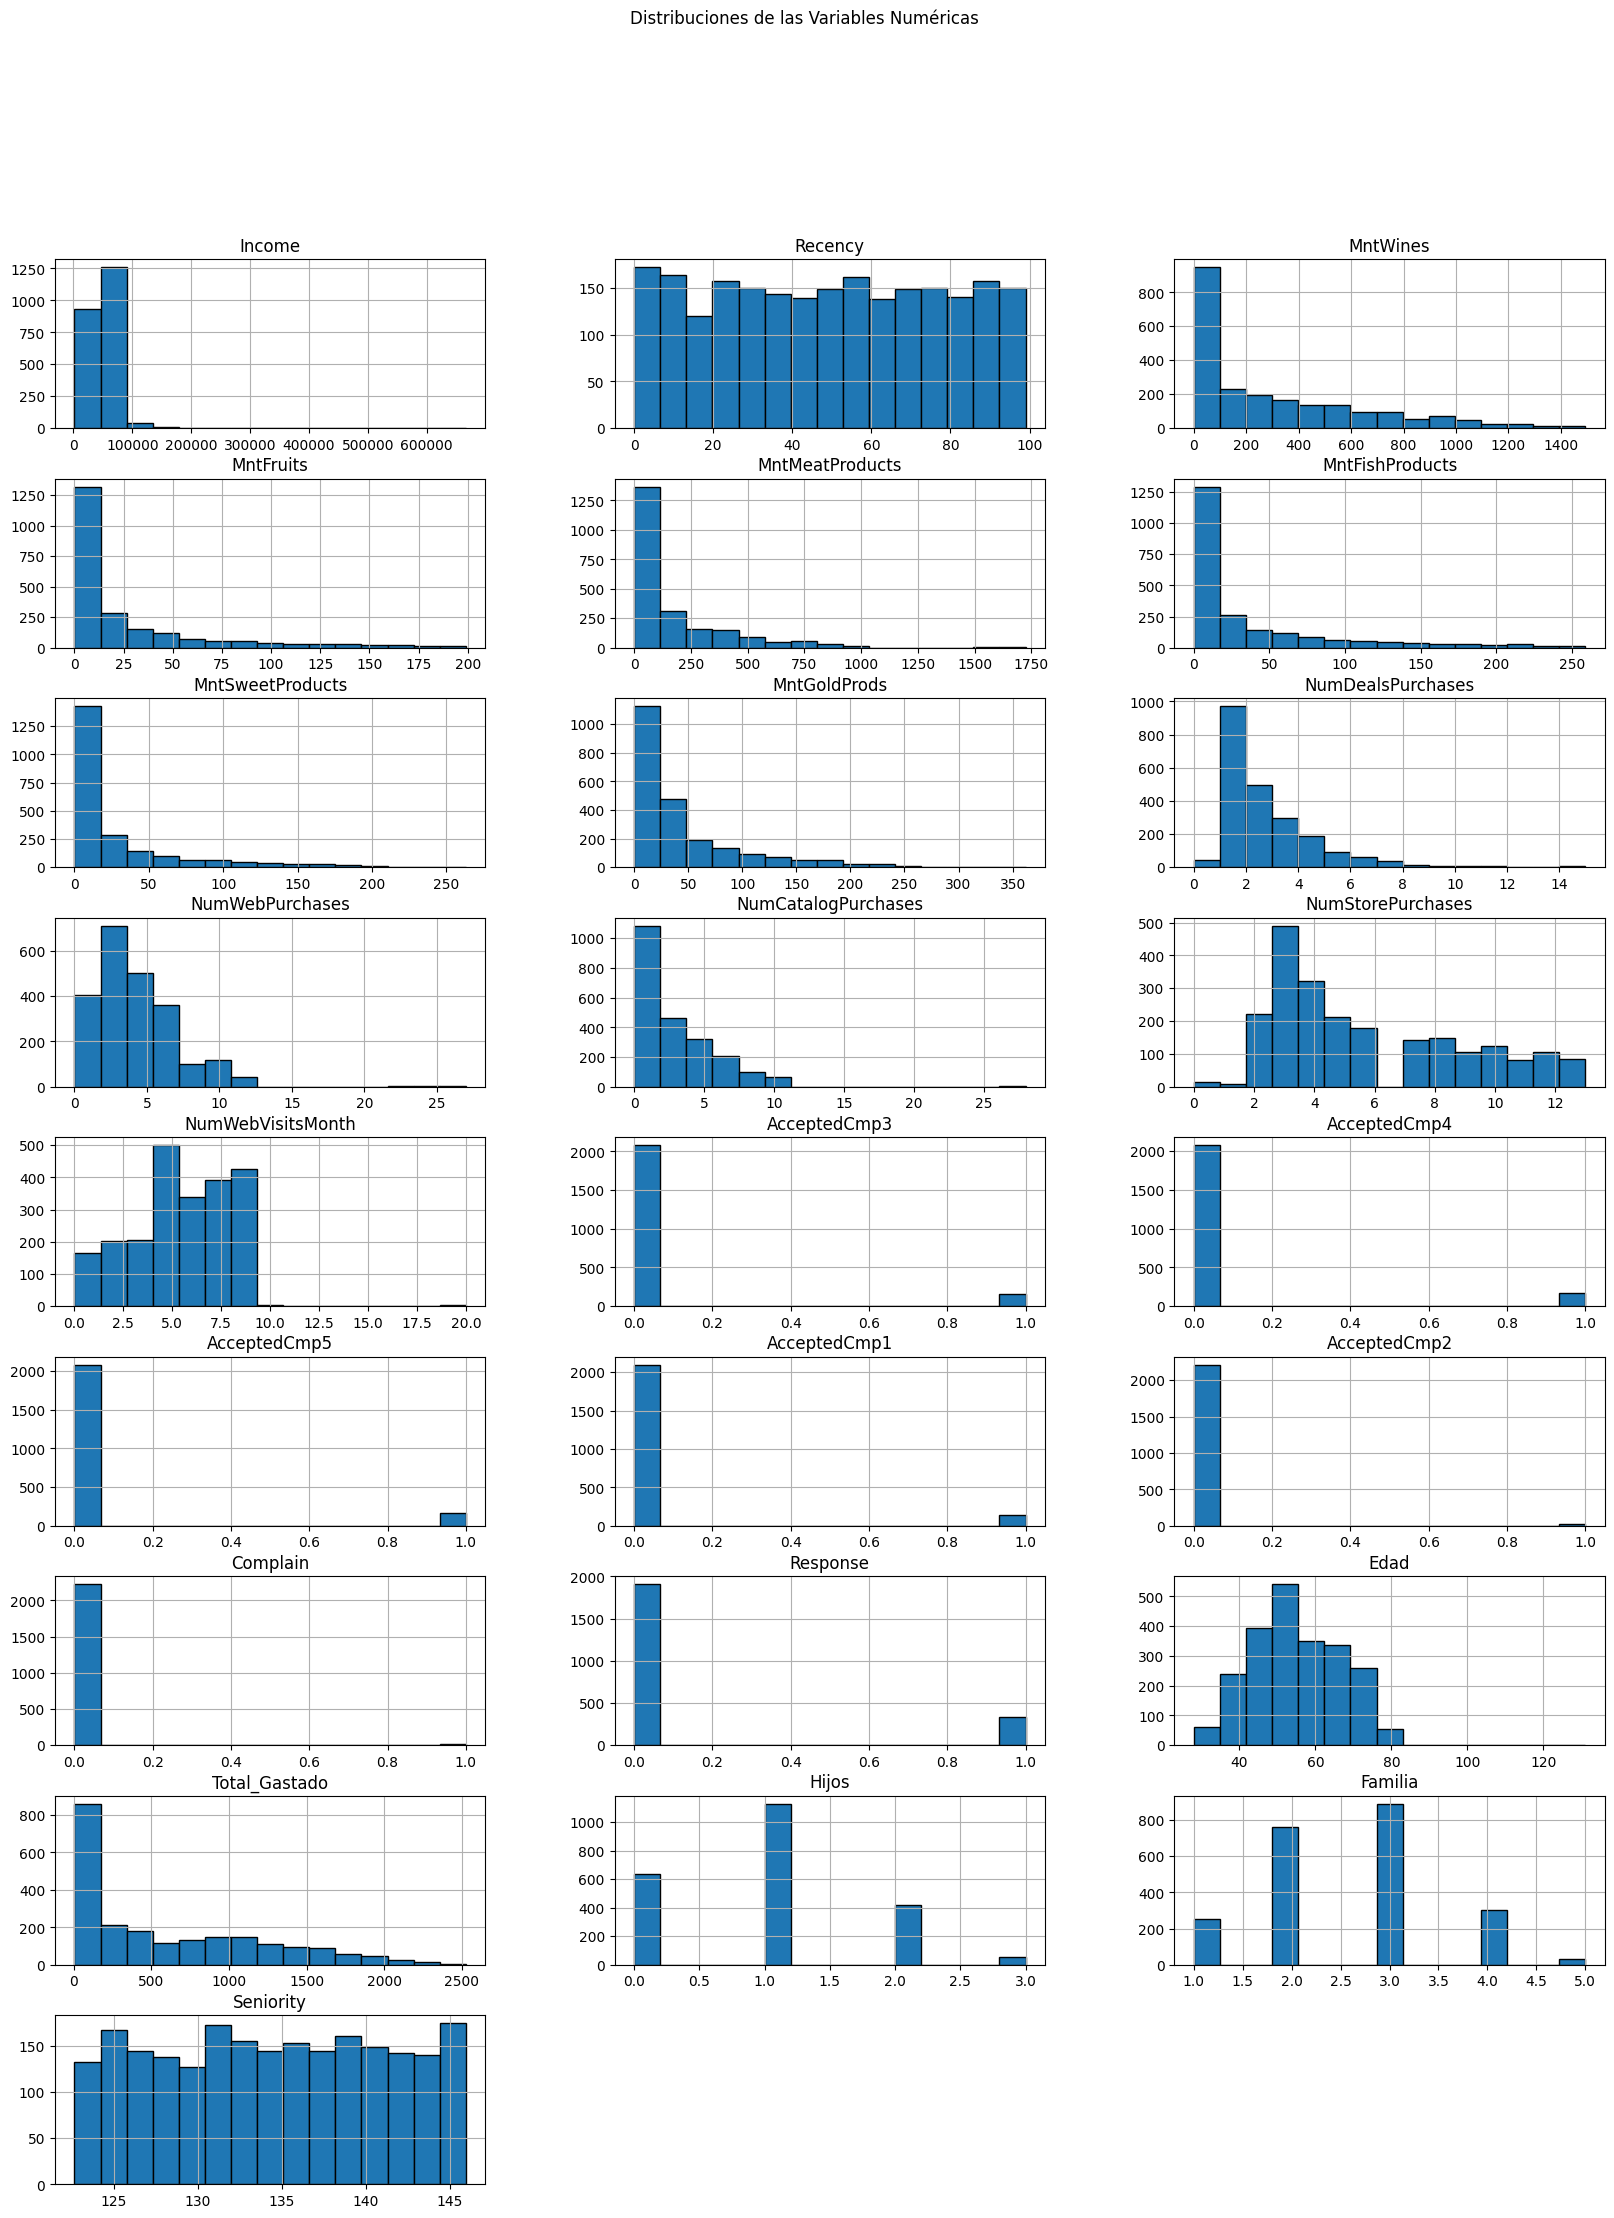

In [13]:
num_cols = df.select_dtypes(exclude='object').columns

# Visualización de las distribuciones de las variables numéricas
df[num_cols].hist(bins=15, figsize=(20, 25), layout=(9, 3), edgecolor='black')
plt.suptitle('Distribuciones de las Variables Numéricas')
plt.show()


In [14]:
df[num_cols].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Edad,Total_Gastado,Hijos,Familia,Seniority
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,...,0.072768,0.064286,0.013393,0.009375,0.149107,55.194196,605.798214,0.950446,2.595089,134.452738
std,25037.797168,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,...,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,602.249288,0.751803,0.906959,6.737417
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000,122.666667
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,68.750000,0.000000,2.000000,128.691667
50%,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,396.000000,1.000000,3.000000,134.516667
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1045.500000,1.000000,3.000000,140.300000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,3.000000,5.000000,145.966667


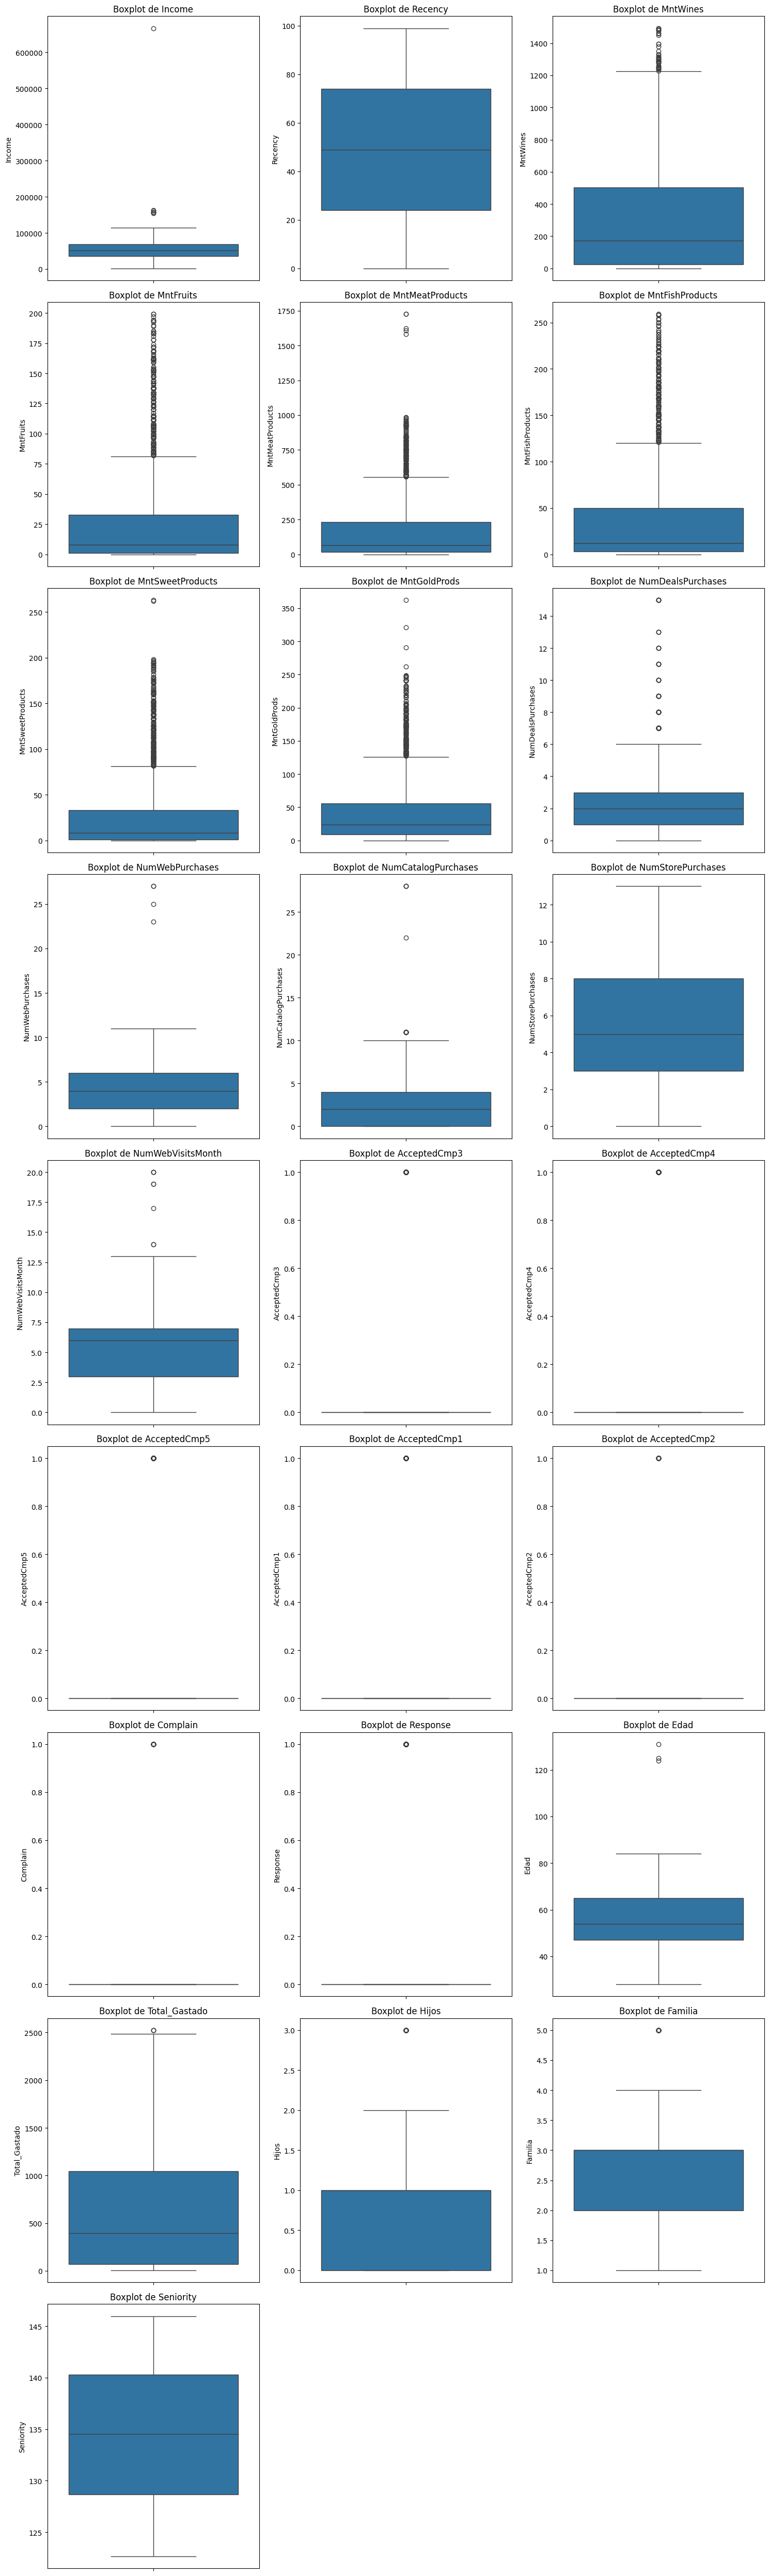

In [15]:
# Visualizar outliers usando diagramas de caja solo para las columnas numéricas
fig, axes = plt.subplots(len(num_cols) // 3 + 1, 3, figsize=(15, 50))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

# Eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
# Eliminamos outliers
print(f"Antes: {len(df)}")
df = df[(df['Edad']<100) & (df['Income']<600000)]
print(f"Después: {len(df)}")

Antes: 2240
Después: 2236


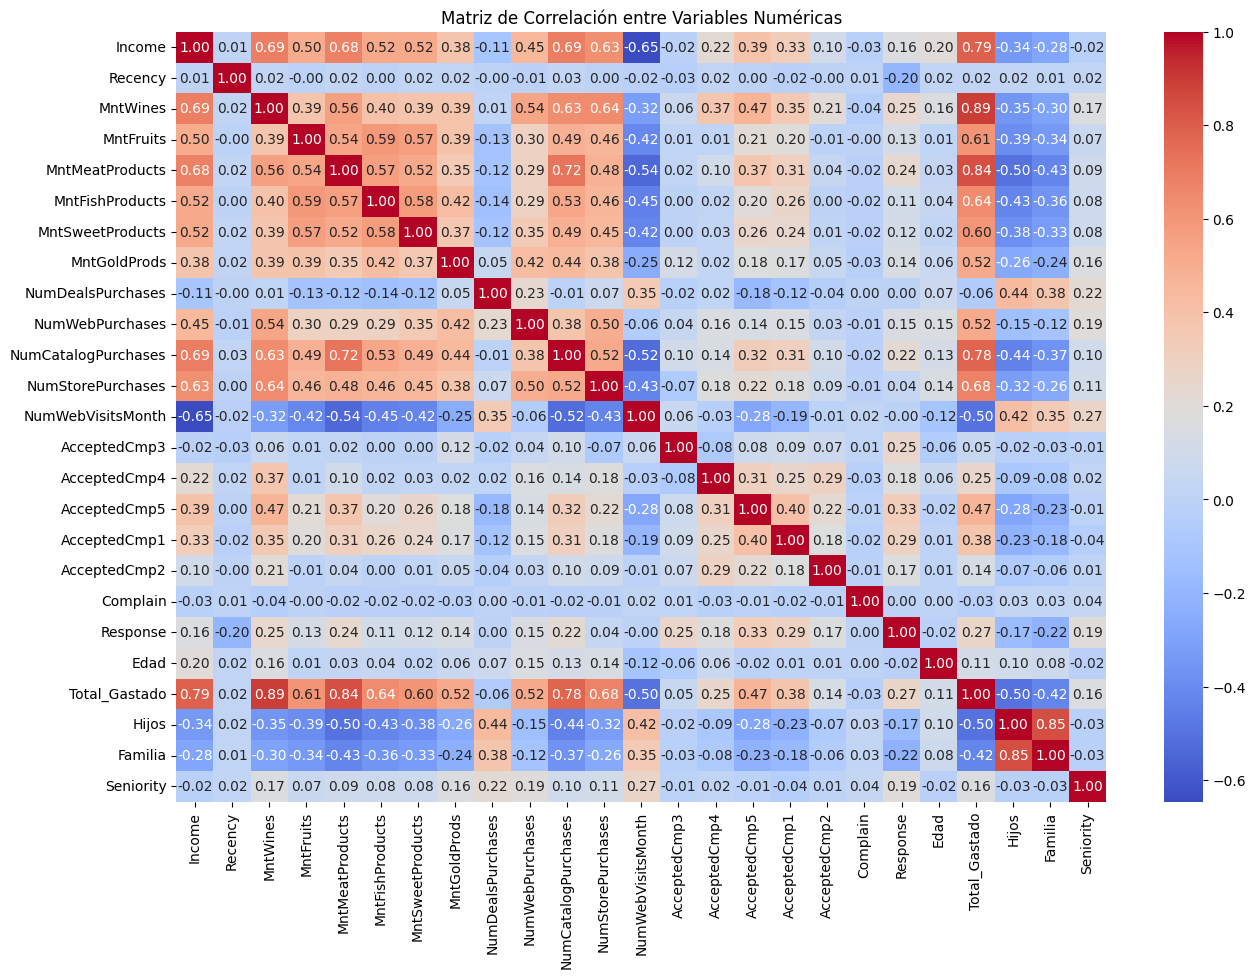

In [17]:
# Correlación
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [18]:
# Modelar los diferentes tipos de clientes mediante un cluster
df.head(5)

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Situacion_Marital,Edad,Total_Gastado,Hijos,Familia,Seniority
0,Grado,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,Solo,67,1617,0,1,144.766667
1,Grado,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,Solo,70,27,2,3,126.433333
2,Grado,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,En pareja,59,776,0,2,133.066667
3,Grado,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,En pareja,40,53,1,3,127.300000
4,Postgrado,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,En pareja,43,422,1,3,128.033333


In [19]:
# Binarizar columnas categóricas.
df.dtypes # Education, Situacion_Marital        
df = pd.get_dummies(df, columns=['Education', 'Situacion_Marital'])
df.dtypes

Income                         float64
Recency                          int64
MntWines                         int64
MntFruits                        int64
MntMeatProducts                  int64
MntFishProducts                  int64
MntSweetProducts                 int64
MntGoldProds                     int64
NumDealsPurchases                int64
NumWebPurchases                  int64
NumCatalogPurchases              int64
NumStorePurchases                int64
NumWebVisitsMonth                int64
AcceptedCmp3                     int64
AcceptedCmp4                     int64
AcceptedCmp5                     int64
AcceptedCmp1                     int64
AcceptedCmp2                     int64
Complain                         int64
Response                         int64
Edad                             int64
Total_Gastado                    int64
Hijos                            int64
Familia                          int64
Seniority                      float64
Education_Grado          

In [20]:
# Estandarizamos las columnas para que todas tenga el mismo penso dentro del algoritmo
scaler = StandardScaler()
scaler.fit(df)
df_escalado = pd.DataFrame(scaler.transform(df), columns=df.columns)
df_escalado.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Edad,Total_Gastado,Hijos,Familia,Seniority,Education_Grado,Education_Postgrado,Education_Primaria,Situacion_Marital_En pareja,Situacion_Marital_Solo
0,0.288513,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,...,1.016868,1.680176,-1.264308,-1.758810,1.529793,0.992870,-0.786840,-0.35878,-1.347635,1.347635
1,-0.262438,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,...,1.273264,-0.962202,1.395139,0.445618,-1.191143,0.992870,-0.786840,-0.35878,-1.347635,1.347635
2,0.917992,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,...,0.333146,0.282541,-1.264308,-0.656596,-0.206659,0.992870,-0.786840,-0.35878,0.742041,-0.742041
3,-1.182621,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,...,-1.290693,-0.918994,0.065416,0.445618,-1.062517,0.992870,-0.786840,-0.35878,0.742041,-0.742041
4,0.295754,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,...,-1.034298,-0.305762,0.065416,0.445618,-0.953679,-1.007181,1.270907,-0.35878,0.742041,-0.742041


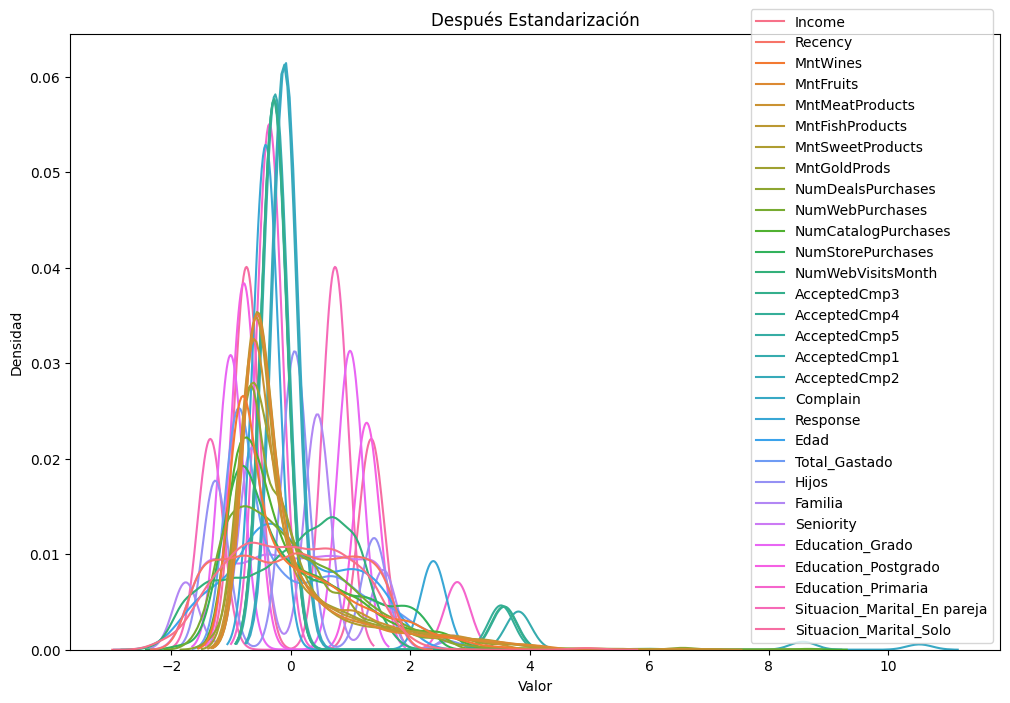

In [21]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=pd.DataFrame(df_escalado, columns=df.columns))
plt.title('Después Estandarización')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

In [22]:
# PCA: reducción de columnas
pca = PCA(n_components=3)
pca.fit(df_escalado)
pca_columns = ['PC1', 'PC2', 'PC3']
PCA_df = pd.DataFrame(pca.transform(df_escalado), columns=pca_columns)
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2236.0,3.495514e-16,2.793009,-5.636011,-2.421238,-0.905162,2.179974,8.431775
PC2,2236.0,-2.224418e-17,1.599364,-4.621048,-1.197578,-0.191715,1.248962,3.890731
PC3,2236.0,-1.588870e-18,1.462071,-4.177015,-1.091336,-0.115491,0.894539,6.457676


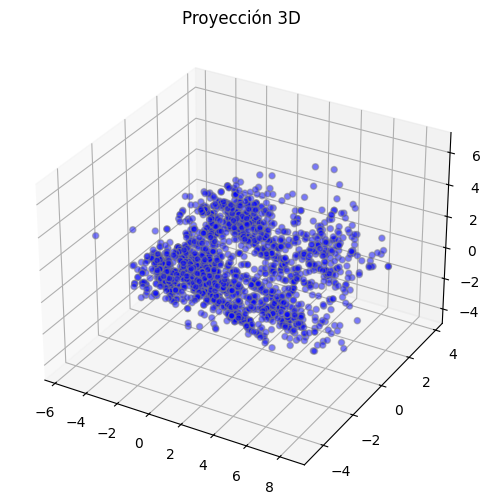

In [23]:
x =PCA_df[pca_columns[0]]
y =PCA_df[pca_columns[1]]
z =PCA_df[pca_columns[2]]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", alpha=0.5, edgecolors="grey", marker="o" )
ax.set_title("Proyección 3D")
plt.show()

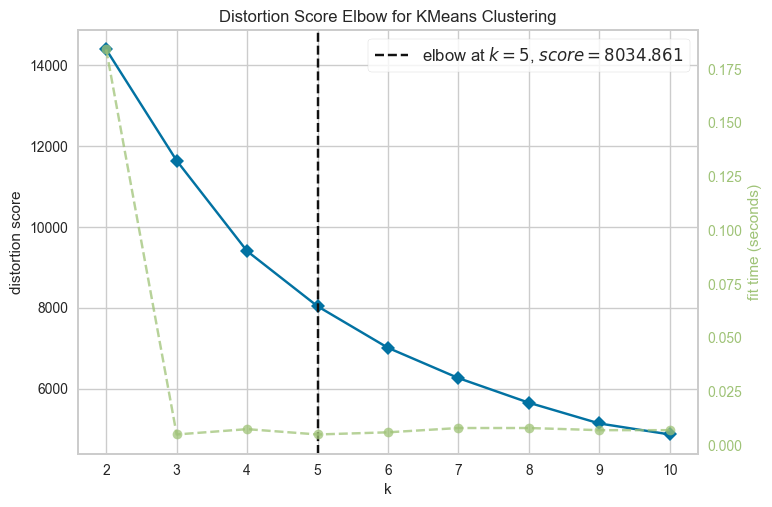

In [24]:
# Clustering - Método saber cuántos clusters
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10, n_init=50, init='k-means++')
Elbow_M.fit(PCA_df)
Elbow_M.show()
plt.show()

In [25]:
# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

NameError: name 'inertia' is not defined

<Figure size 800x600 with 0 Axes>

In [26]:
# K Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=50, init='k-means++')
cluster_labels = kmeans.fit_predict(PCA_df)

In [27]:
PCA_df["clusters"] = cluster_labels
df["clusters"] = cluster_labels
df_escalado["clusters"] = cluster_labels

In [28]:
features = ['Education_Primaria','Education_Postgrado', 'Education_Grado', 'Income', 'NumWebVisitsMonth', 'Edad', 'Total_Gastado', 'Familia', 'Hijos', 'Situacion_Marital_En pareja', 'Situacion_Marital_Solo']
grouped_clusters = df.groupby(['clusters'])[features].mean()
grouped_clusters.sort_values(['Income', 'Total_Gastado'], ascending=False)

,Education_Primaria,Education_Postgrado,Education_Grado,Income,NumWebVisitsMonth,Edad,Total_Gastado,Familia,Hijos,Situacion_Marital_En pareja,Situacion_Marital_Solo
clusters,,,,,,,,,,,
1,0.098720,0.299817,0.601463,75699.815366,2.859232,55.307130,1394.360146,1.742230,0.193784,0.548446,0.451554
3,0.048421,0.583158,0.368421,62323.396859,5.360000,59.366316,872.227368,2.894737,1.084211,0.810526,0.189474
0,0.138462,0.351648,0.509890,38206.348370,6.397802,53.191209,173.874725,2.189011,1.175824,0.013187,0.986813
2,0.151515,0.334651,0.513834,36615.971029,6.418972,53.430830,130.237154,3.267457,1.277997,0.989460,0.010540


### Cluster 0:  Clientes Solitarios de Bajos Ingresos y Bajos Gastos
- **Educación**: Diversa, con inclinación hacia estudios universitarios y postgrado.
- **Ingresos**: Bajos ($38,206 en promedio).
- **Comportamiento en línea**: Alto número de visitas web.
- **Edad**: Promedio de 53 años.
- **Gasto total**: Muy bajo ($174 en promedio).
- **Estructura familiar**: Generalmente pequeñas.
- **Situación Marital**: Mayormente solos.

### Cluster 1: Clientes Establecidos de Alta Gama
- **Educación**: Mayormente graduados universitarios y postgrado.
- **Ingresos**: Altos ($75,699 en promedio).
- **Comportamiento en línea**: Bajas visitas web mensuales.
- **Edad**: Mayoría alrededor de 55 años.
- **Gasto total**: Alto ($1,394 en promedio).
- **Estructura familiar**: Mayormente parejas, con pocos hijos.
- **Situación Marital**: Divididos casi equitativamente entre en pareja y solos.

### Cluster 2: Clientes con Familias de Bajos Ingresos y Bajos Gastos
- **Educación**: Buena proporción con estudios universitarios y postgrado.
- **Ingresos**: Bajos ($36,616 en promedio).
- **Comportamiento en línea**: Muy activos online.
- **Edad**: Jóvenes, alrededor de 53 años.
- **Gasto total**: Muy bajo ($130 en promedio).
- **Estructura familiar**: Las familias más grandes en el estudio, con más hijos.
- **Situación Marital**: Predominantemente solos.

### Cluster 3: Clientes con Gastos Moderados
- **Educación**: Alta proporción con estudios de postgrado.
- **Ingresos**: Moderados ($62,323 en promedio).
- **Comportamiento en línea**: Moderado número de visitas web.
- **Edad**: Mayormente mayores de 59 años.
- **Gasto total**: Moderado ($872 en promedio).
- **Estructura familiar**: Con al menos un hijo.
- **Situación Marital**: Mayormente en pareja.


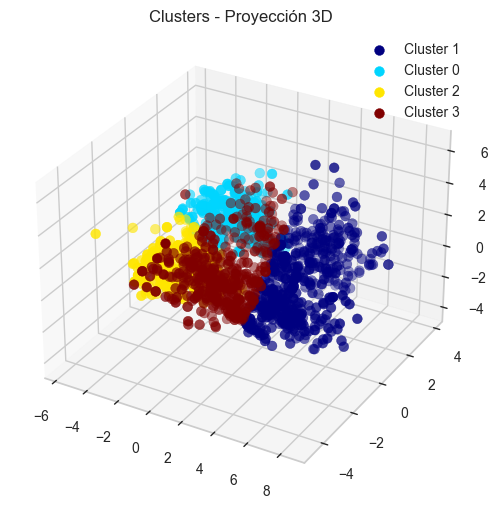

In [69]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = PCA_df[pca_columns[0]]
y = PCA_df[pca_columns[1]]
z = PCA_df[pca_columns[2]]

clusters = PCA_df['clusters'].unique()

colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

for cluster, color in zip(clusters, colors):
    ix = PCA_df['clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)
    
ax.set_title('Clusters - Proyección 3D')
ax.legend()
plt.show()

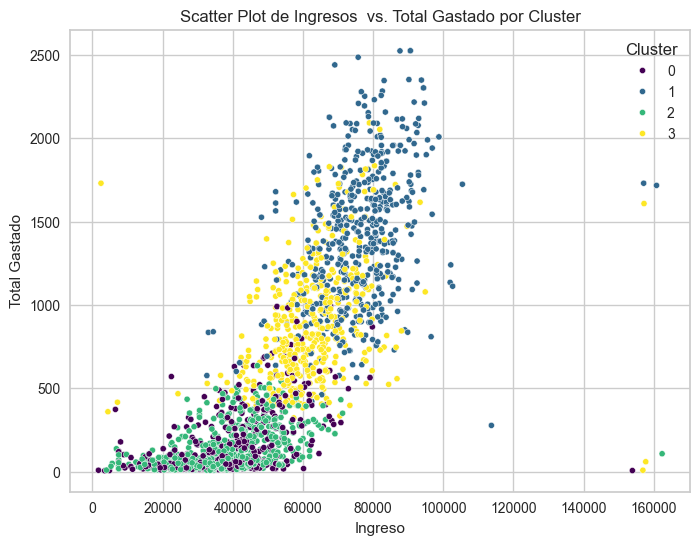

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_Gastado', hue='clusters', data=df, palette='viridis', s=20)

plt.title('Scatter Plot de Ingresos  vs. Total Gastado por Cluster')
plt.xlabel('Ingreso')
plt.ylabel('Total Gastado')
plt.legend(title='Cluster')
plt.show()

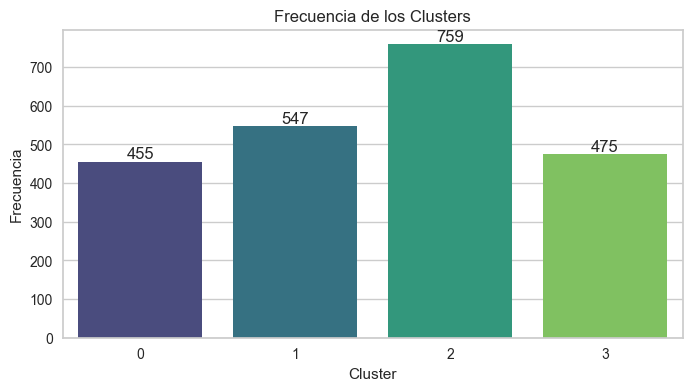

In [71]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='clusters', data=df, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frecuencia de los Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frecuencia')
plt.show()

In [43]:
# Método del codo para encontrar el número óptimo de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_escalado)
    inertia.append(kmeans.inertia_)